# OSM Processing

## Import Packages

In [1]:
import os
import geopandas as gpd

## Set Directory:

In [2]:
#directory of osm data
file_directory = r'C:\Users\tpassmore6\Documents\GitHub\BikewaySimDev'

#cahnge directory
os.chdir(file_directory)

## Import custom modules

In [3]:
from osm_dwnld import *
from bokeh_plots import *

## Choose Study Area Filepath

<AxesSubplot:>

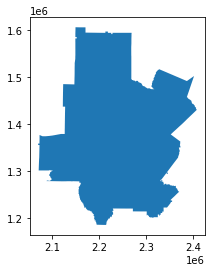

In [4]:
#studyareafp = r'base_shapefiles/bikewaysim_study_area/bikewaysim_study_area.shp'
studyareafp = r'base_shapefiles/arc/arc_bounds.shp'

gdf = gpd.read_file(studyareafp)
gdf.plot()

## Download OSM from OSMnx

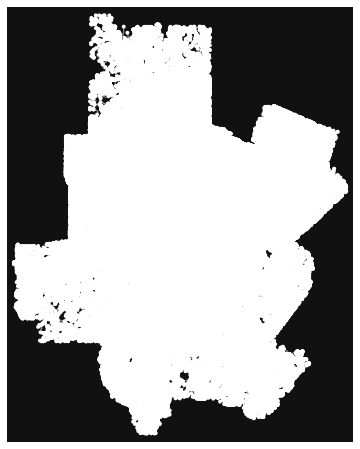

In [5]:
osmnx_nodes, osmnx_links = download_osmnx(gdf)

## Download OSM as GeoJSON from Overpass API

In [6]:
overpass_links = overpass_download(gdf)

The bounding box is -84.91106335095031, 33.25651732623962, -83.79890104122266, 34.41259656614879


C:\Users\tpassmore6\Documents\GitHub\BikewaySimDev\base_shapefiles\osm\osm_dwnld.py:80: FutureWarning: The default value of regex will change from True to False in a future version.
  df.columns = df.columns.str.replace(r'tags.', '')


## Join OSMnx data and attribute data from Overpass

In [21]:
#test merge
complete_dataset = pd.merge(osmnx_links, overpass_links, left_on=('osmid'), right_on=('id'), how = 'inner')
complete_dataset = complete_dataset.drop(columns={'nodes'})

#project and drop in NA rows
complete_dataset.to_crs(epsg='2240', inplace = True)

In [22]:
len(complete_dataset)

900123

In [25]:
#complete_dataset.dropna(how='all', axis = 1, inplace = True)
#complete_dataset.dropna(how='all', axis = 0, inplace = True)

export = export[(export['geometry'].notnull() | export['osmid'].notnull())]

len(export)

900123

In [26]:
pd.isnull(export['geometry'])

0         False
1         False
2         False
3         False
4         False
          ...  
900118    False
900119    False
900120    False
900121    False
900122    False
Name: geometry, Length: 900123, dtype: bool

## Examine

In [ ]:
#plot_bokeh_map(complete_dataset)

In [14]:
complete_dataset.head()

,osmid,A,B,geometry,type,id,destination,highway,oneway,name,...,waterway,placement:backward:end,placement:backward:start,height,crossing_ref,placement:both_ways,placement:end,placement:start,lat,lon
0,9106163,67358015,67358019,"LINESTRING (2248793.531 1323653.512, 2248796.3...",way,9106163,NaN,residential,NaN,Rocklane Drive,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,9106163,67358019,67358022,"LINESTRING (2248785.044 1323294.540, 2248793.5...",way,9106163,NaN,residential,NaN,Rocklane Drive,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,9106163,67358022,67358027,"LINESTRING (2248780.579 1323140.125, 2248785.0...",way,9106163,NaN,residential,NaN,Rocklane Drive,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,9106163,67358027,67358031,"LINESTRING (2248776.843 1322723.146, 2248783.5...",way,9106163,NaN,residential,NaN,Rocklane Drive,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,9111908,67358015,783782570,"LINESTRING (2249252.436 1324004.708, 2249068.6...",way,9111908,NaN,tertiary,NaN,Rock Cut Place,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
export = complete_dataset[['osmid','A','B','geometry']]

In [27]:
export[export.isnull()]

,osmid,A,B,geometry
0,NaN,NaN,NaN,None
1,NaN,NaN,NaN,None
2,NaN,NaN,NaN,None
3,NaN,NaN,NaN,None
4,NaN,NaN,NaN,None
...,...,...,...,...
900118,NaN,NaN,NaN,None
900119,NaN,NaN,NaN,None
900120,NaN,NaN,NaN,None
900121,NaN,NaN,NaN,None


In [28]:
export.head()

,osmid,A,B,geometry
0,9106163,67358015,67358019,"LINESTRING (2248793.531 1323653.512, 2248796.3..."
1,9106163,67358019,67358022,"LINESTRING (2248785.044 1323294.540, 2248793.5..."
2,9106163,67358022,67358027,"LINESTRING (2248780.579 1323140.125, 2248785.0..."
3,9106163,67358027,67358031,"LINESTRING (2248776.843 1322723.146, 2248783.5..."
4,9111908,67358015,783782570,"LINESTRING (2249252.436 1324004.708, 2249068.6..."


## Export as GPKG

In [11]:
#complete_dataset.to_file("base_shapefiles/osm/osm_links.geojson", driver = 'GeoJSON')
export.to_file("base_shapefiles/osm/osm_links.gpkg", driver = 'GPKG')
#osmnx_nodes.to_file("base_shapefiles/osm/osm_links.gpkg", driver = 'GPKG')

CPLE_AppDefinedError: b'failed to prepare SQL: SELECT "fid", ST_MinX("geom"), ST_MaxX("geom"), ST_MinY("geom"), ST_MaxY("geom") FROM "osm_links" WHERE "geom" NOT NULL AND NOT ST_IsEmpty("geom")'

Exception ignored in: 'fiona._shim.gdal_flush_cache'
Traceback (most recent call last):
  File "fiona/_err.pyx", line 201, in fiona._err.GDALErrCtxManager.__exit__
fiona._err.CPLE_AppDefinedError: b'failed to prepare SQL: SELECT "fid", ST_MinX("geom"), ST_MaxX("geom"), ST_MinY("geom"), ST_MaxY("geom") FROM "osm_links" WHERE "geom" NOT NULL AND NOT ST_IsEmpty("geom")'


RuntimeError: GDAL Error: sqlite3_exec(CREATE TABLE "osm_links" ( "fid" INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL, "geom" LINESTRING, "osmid" INTEGER, "A" INTEGER, "B" INTEGER, "type" TEXT, "id" INTEGER, "destination" TEXT, "highway" TEXT, "oneway" TEXT, "name" TEXT, "tiger:cfcc" TEXT, "tiger:county" TEXT, "tiger:name_base" TEXT, "tiger:name_type" TEXT, "tiger:reviewed" TEXT, "tiger:zip_left" TEXT, "tiger:zip_right" TEXT, "tiger:separated" TEXT, "tiger:source" TEXT, "tiger:tlid" TEXT, "tiger:upload_uuid" TEXT, "access" TEXT, "service" TEXT, "destination:ref" TEXT, "surface" TEXT, "junction:ref" TEXT, "HFCS" TEXT, "maxspeed" TEXT, "source:HFCS" TEXT, "source:highway" TEXT, "tiger:name_direction_prefix" TEXT, "tiger:name_direction_suffix" TEXT, "name_1" TEXT, "tiger:name_base_1" TEXT, "tiger:name_type_1" TEXT, "tiger:zip_left_1" TEXT, "tiger:zip_right_1" TEXT, "lanes" TEXT, "tiger:zip_left_2" TEXT, "tiger:name_direction_suffix_1" TEXT, "bicycle" TEXT, "foot" TEXT, "hgv" TEXT, "horse" TEXT, "minspeed" TEXT, "ref" TEXT, "sidewalk" TEXT, "unsigned_ref" TEXT, "name_2" TEXT, "tiger:name_base_2" TEXT, "turn:lanes" TEXT, "smoothness" TEXT, "abandoned:railway" TEXT, "hgv:national_network" TEXT, "source:hgv:national_network" TEXT, "alt_name" TEXT, "tiger:zip_right_2" TEXT, "tiger:zip_left_3" TEXT, "tiger:zip_left_4" TEXT, "tiger:zip_right_3" TEXT, "tiger:zip_right_4" TEXT, "bridge" TEXT, "layer" TEXT, "old_ref" TEXT, "short_name" TEXT, "FIXME" TEXT, "lanes:backward" TEXT, "lanes:forward" TEXT, "turn:lanes:backward" TEXT, "old_name" TEXT, "source" TEXT, "name:etymology:wikidata" TEXT, "rcn_ref" TEXT, "tiger:name_direction_prefix_1" TEXT, "source:maxspeed" TEXT, "tiger:name_base_3" TEXT, "turn:lanes:forward" TEXT, "tiger:name_direction_prefix_2" TEXT, "tiger:name_type_2" TEXT, "NHS" TEXT, "fixme" TEXT, "created_by" TEXT, "tiger:name_direction_suffix_2" TEXT, "lit" TEXT, "cycleway:right" TEXT, "cycleway:both" TEXT, "maxspeed:type" TEXT, "tiger:name_base_4" TEXT, "tiger:name_type_4" TEXT, "motor_vehicle" TEXT, "maxspeed:advisory" TEXT, "note:lanes" TEXT, "description" TEXT, "tracktype" TEXT, "note" TEXT, "maxaxles" TEXT, "maxlength" TEXT, "maxweight" TEXT, "destination:ref:to" TEXT, "destination:lanes" TEXT, "maxheight:lane" TEXT, "junction" TEXT, "note:access" TEXT, "destination:street" TEXT, "start_date" TEXT, "cycleway" TEXT, "postal_code" TEXT, "hgv:minaxles" TEXT, "hov:lanes" TEXT, "tiger:name_type_3" TEXT, "parking" TEXT, "placement:forward" TEXT, "direction" TEXT, "construction" TEXT, "destination:ref:lanes" TEXT, "destination:ref:to:lanes" TEXT, "opening_hours" TEXT, "noname" TEXT, "note:railway" TEXT, "railway" TEXT, "addr:city" TEXT, "is_in:city" TEXT, "source:maxspeed_1" TEXT, "is_in" TEXT, "official_name" TEXT, "sidewalk_1" TEXT, "addr:postcode" TEXT, "addr:state" TEXT, "oneway_1" TEXT, "cycleway:left" TEXT, "oneway:bicycle" TEXT, "segregated" TEXT, "source:note" TEXT, "note:width" TEXT, "width" TEXT, "note:highway" TEXT, "addr:country" TEXT, "closed" TEXT, "access:lanes" TEXT, "motorcycle" TEXT, "maxheight" TEXT, "short" TEXT, "short_name_1" TEXT, "goods" TEXT, "source:name" TEXT, "ford" TEXT, "note:sidewalk" TEXT, "traffic_calming" TEXT, "level" TEXT, "access:psv" TEXT, "note:alt_name" TEXT, "note:name" TEXT, "name_3" TEXT, "blaze" TEXT, "sac_scale" TEXT, "trail_visibility" TEXT, "highway_1" TEXT, "check_date:surface" TEXT, "lcn_ref" TEXT, "name:etymology" TEXT, "oneway:conditional" TEXT, "abandoned" TEXT, "LandPro08:DE3" TEXT, "footway" TEXT, "tiger:name_direction_suffix_3" TEXT, "golf" TEXT, "source:cycleway" TEXT, "class:bicycle" TEXT, "covered" TEXT, "addr:housenumber" TEXT, "addr:street" TEXT, "place" TEXT, "tiger:zip" TEXT, "centre_turn_lane" TEXT, "traffic_signals:direction" TEXT, "noexit" TEXT, "LandPro08:DE5" TEXT, "surface:note" TEXT, "oneway_type" TEXT, "golf_cart" TEXT, "narrow" TEXT, "source:destination" TEXT, "hov" TEXT, "destination:symbol" TEXT, "destination:to" TEXT, "toll" TEXT, "destination:street:to" TEXT, "placement" TEXT, "bus" TEXT, "check_date" TEXT, "opening_date" TEXT, "smoking" TEXT, "taxi:lanes" TEXT, "gatech:PRKG_NUM" TEXT, "embedded_rails" TEXT, "tunnel" TEXT, "parking:lane:both" TEXT, "parking:lane:right" TEXT, "crossing" TEXT, "incline" TEXT, "loc_name" TEXT, "motor_vehicle:conditional" TEXT, "note:oneway" TEXT, "wheelchair" TEXT, "lanes:both_ways" TEXT, "turn:lanes:both_ways" TEXT, "electrified" TEXT, "gauge" TEXT, "old_railway_operator" TEXT, "operator" TEXT, "note:maxspeed" TEXT, "tiger:name_base_5" TEXT, "vehicle:conditional" TEXT, "psv" TEXT, "taxi" TEXT, "LandPro08:LC_NAME" TEXT, "LandPro08:LU_NAME" TEXT, "landuse" TEXT, "parking:lane:both:parallel" TEXT, "disused:highway" TEXT, "disused:name" TEXT, "end_date:railway" TEXT, "note:old_railway_operator" TEXT, "maxspeed:variable" TEXT, "cycleway:est_width" TEXT, "parking:lane:left" TEXT, "change:lanes:backward" TEXT, "car" TEXT, "parking:lane:left:parallel" TEXT, "destination:lanes:forward" TEXT, "noref" TEXT, "name:ru" TEXT, "lane_markings" TEXT, "change:lanes" TEXT, "vehicle" TEXT, "bus:lanes" TEXT, "motorcar" TEXT, "ski" TEXT, "snowmobile" TEXT, "motor_vehicle:lanes" TEXT, "rideshare" TEXT, "maxspeed:advised" TEXT, "mofa" TEXT, "moped" TEXT, "reg_name" TEXT, "source:lanes" TEXT, "maxweight:signed" TEXT, "length" TEXT, "center_turn_lane" TEXT, "cutting" TEXT, "LandPro08:reviewed" TEXT, "addr:county" TEXT, "attribution" TEXT, "addr:interpolation" TEXT, "tourism" TEXT, "website" TEXT, "bridge:name" TEXT, "county" TEXT, "lcn" TEXT, "area" TEXT, "undefined" TEXT, "fee" TEXT, "hgv:lanes" TEXT, "step_count" TEXT, "handrail:center" TEXT, "ramp" TEXT, "private" TEXT, "historic:operator" TEXT, "old_name_1" TEXT, "change:backward" TEXT, "Mo-Su" TEXT, "README" TEXT, "note:foot" TEXT, "source:bridge" TEXT, "no_name" TEXT, "FayettevilleGIS:address_hi" TEXT, "FayettevilleGIS:address_lo" TEXT, "amenity" TEXT, "historic" TEXT, "capacity" TEXT, "minibus" TEXT, "name_" TEXT, "FIXME:hgv" TEXT, "local_name" TEXT, "offset" TEXT, "hiking" TEXT, "gatech:BLDG_NAME" TEXT, "gatech:BLDG_NUM" TEXT, "gatech:BLDG_TYPE" TEXT, "NHD:way_id" TEXT, "embankment" TEXT, "hov:minimum" TEXT, "parking:lanes:both" TEXT, "leisure" TEXT, "change:lanes:forward" TEXT, "note_1" TEXT, "designation" TEXT, "rcn" TEXT, "delivery" TEXT, "bridge:structure" TEXT, "public_transport" TEXT, "distance" TEXT, "mtb:scale:imba" TEXT, "roundtrip" TEXT, "parking:condition:right" TEXT, "parking:condition:right:2" TEXT, "parking:condition:right:2:time_interval" TEXT, "parking:condition:right:maxstay" TEXT, "parking:condition:right:time_interval" TEXT, "parking:lane:right:parallel" TEXT, "source:maxspeed:advisory" TEXT, "wikidata" TEXT, "wikipedia" TEXT, "parking:condition:left" TEXT, "parking:condition:both" TEXT, "park_ride" TEXT, "access:bus" TEXT, "contact:website" TEXT, "tiger:direction" TEXT, "parking:lane:left:capacity" TEXT, "handrail" TEXT, "tactile_paving" TEXT, "source:construction" TEXT, "dog" TEXT, "mtb:scale" TEXT, "mtb:scale:uphill" TEXT, "crossing:island" TEXT, "bus:lanes:backward" TEXT, "motor_vehicle:lanes:backward" TEXT, "source:sidewalk" TEXT, "SUBDIVIS_1" TEXT, "TYPE" TEXT, "destination:lanes:backward" TEXT, "drive_through" TEXT, "network" TEXT, "route" TEXT, "name:cycleway" TEXT, "zip_left" TEXT, "zip_right" TEXT, "tiger:name_suffix" TEXT, "paved" TEXT, "man_made" TEXT, "driveway" TEXT, "maxheight:physical" TEXT, "emergency" TEXT, "destination:backward" TEXT, "addr:inclusion" TEXT, "motorcycle:lanes" TEXT, "source:date" TEXT, "line" TEXT, "source:turn:lanes" TEXT, "animal_shelter:adoption" TEXT, "placement:backward" TEXT, "width:lanes" TEXT, "abandoned:highway" TEXT, "passing_places" TEXT, "maxspeed:practical" TEXT, "destination:ref:backward" TEXT, "seasonal" TEXT, "kerb" TEXT, "handrail:left" TEXT, "handrail:right" TEXT, "ramp:bicycle" TEXT, "ramp:wheelchair" TEXT, "turn" TEXT, "alt_name_1" TEXT, "caravan" TEXT, "caravans" TEXT, "payment:cash" TEXT, "payment:peachpass" TEXT, "payment:quickpass" TEXT, "payment:sunpass" TEXT, "note:destination" TEXT, "destination:to:lanes" TEXT, "destination:forward" TEXT, "steps" TEXT, "destination:ref:forward" TEXT, "demolished:highway" TEXT, "informal" TEXT, "toll:lanes" TEXT, "destination:ref:to:backward" TEXT, "destination:ref:lanes:forward" TEXT, "motorroad" TEXT, "stairs" TEXT, "hgv:conditional" TEXT, "indoor" TEXT, "cycleway:surface" TEXT, "footway:surface" TEXT, "conveying" TEXT, "access:conditional" TEXT, "school" TEXT, "buses" TEXT, "colour" TEXT, "change:forward" TEXT, "change" TEXT, "bicycle:lanes:backward" TEXT, "bicycle:lanes:forward" TEXT, "brand" TEXT, "brand:wikidata" TEXT, "brand:wikipedia" TEXT, "cuisine" TEXT, "takeaway" TEXT, "material" TEXT, "access_aisle" TEXT, "waterway" TEXT, "placement:backward:end" TEXT, "placement:backward:start" TEXT, "height" TEXT, "crossing_ref" TEXT, "placement:both_ways" TEXT, "placement:end" TEXT, "placement:start" TEXT, "lat" REAL, "lon" REAL)) failed: duplicate column name: fixme 
 
 Failed to write record: {'id': '0', 'type': 'Feature', 'properties': {'A': 67358015, 'B': 67358019, 'FIXME': None, 'FIXME:hgv': None, 'FayettevilleGIS:address_hi': None, 'FayettevilleGIS:address_lo': None, 'HFCS': None, 'LandPro08:DE3': None, 'LandPro08:DE5': None, 'LandPro08:LC_NAME': None, 'LandPro08:LU_NAME': None, 'LandPro08:reviewed': None, 'Mo-Su': None, 'NHD:way_id': None, 'NHS': None, 'README': None, 'SUBDIVIS_1': None, 'TYPE': None, 'abandoned': None, 'abandoned:highway': None, 'abandoned:railway': None, 'access': None, 'access:bus': None, 'access:conditional': None, 'access:lanes': None, 'access:psv': None, 'access_aisle': None, 'addr:city': None, 'addr:country': None, 'addr:county': None, 'addr:housenumber': None, 'addr:inclusion': None, 'addr:interpolation': None, 'addr:postcode': None, 'addr:state': None, 'addr:street': None, 'alt_name': None, 'alt_name_1': None, 'amenity': None, 'animal_shelter:adoption': None, 'area': None, 'attribution': None, 'bicycle': None, 'bicycle:lanes:backward': None, 'bicycle:lanes:forward': None, 'blaze': None, 'brand': None, 'brand:wikidata': None, 'brand:wikipedia': None, 'bridge': None, 'bridge:name': None, 'bridge:structure': None, 'bus': None, 'bus:lanes': None, 'bus:lanes:backward': None, 'buses': None, 'capacity': None, 'car': None, 'caravan': None, 'caravans': None, 'center_turn_lane': None, 'centre_turn_lane': None, 'change': None, 'change:backward': None, 'change:forward': None, 'change:lanes': None, 'change:lanes:backward': None, 'change:lanes:forward': None, 'check_date': None, 'check_date:surface': None, 'class:bicycle': None, 'closed': None, 'colour': None, 'construction': None, 'contact:website': None, 'conveying': None, 'county': None, 'covered': None, 'created_by': None, 'crossing': None, 'crossing:island': None, 'crossing_ref': None, 'cuisine': None, 'cutting': None, 'cycleway': None, 'cycleway:both': None, 'cycleway:est_width': None, 'cycleway:left': None, 'cycleway:right': None, 'cycleway:surface': None, 'delivery': None, 'demolished:highway': None, 'description': None, 'designation': None, 'destination': None, 'destination:backward': None, 'destination:forward': None, 'destination:lanes': None, 'destination:lanes:backward': None, 'destination:lanes:forward': None, 'destination:ref': None, 'destination:ref:backward': None, 'destination:ref:forward': None, 'destination:ref:lanes': None, 'destination:ref:lanes:forward': None, 'destination:ref:to': None, 'destination:ref:to:backward': None, 'destination:ref:to:lanes': None, 'destination:street': None, 'destination:street:to': None, 'destination:symbol': None, 'destination:to': None, 'destination:to:lanes': None, 'direction': None, 'distance': None, 'disused:highway': None, 'disused:name': None, 'dog': None, 'drive_through': None, 'driveway': None, 'electrified': None, 'embankment': None, 'embedded_rails': None, 'emergency': None, 'end_date:railway': None, 'fee': None, 'fixme': None, 'foot': None, 'footway': None, 'footway:surface': None, 'ford': None, 'gatech:BLDG_NAME': None, 'gatech:BLDG_NUM': None, 'gatech:BLDG_TYPE': None, 'gatech:PRKG_NUM': None, 'gauge': None, 'golf': None, 'golf_cart': None, 'goods': None, 'handrail': None, 'handrail:center': None, 'handrail:left': None, 'handrail:right': None, 'height': None, 'hgv': None, 'hgv:conditional': None, 'hgv:lanes': None, 'hgv:minaxles': None, 'hgv:national_network': None, 'highway': 'residential', 'highway_1': None, 'hiking': None, 'historic': None, 'historic:operator': None, 'horse': None, 'hov': None, 'hov:lanes': None, 'hov:minimum': None, 'id': 9106163, 'incline': None, 'indoor': None, 'informal': None, 'is_in': None, 'is_in:city': None, 'junction': None, 'junction:ref': None, 'kerb': None, 'landuse': None, 'lane_markings': None, 'lanes': None, 'lanes:backward': None, 'lanes:both_ways': None, 'lanes:forward': None, 'lat': None, 'layer': None, 'lcn': None, 'lcn_ref': None, 'leisure': None, 'length': None, 'level': None, 'line': None, 'lit': None, 'loc_name': None, 'local_name': None, 'lon': None, 'man_made': None, 'material': None, 'maxaxles': None, 'maxheight': None, 'maxheight:lane': None, 'maxheight:physical': None, 'maxlength': None, 'maxspeed': None, 'maxspeed:advised': None, 'maxspeed:advisory': None, 'maxspeed:practical': None, 'maxspeed:type': None, 'maxspeed:variable': None, 'maxweight': None, 'maxweight:signed': None, 'minibus': None, 'minspeed': None, 'mofa': None, 'moped': None, 'motor_vehicle': None, 'motor_vehicle:conditional': None, 'motor_vehicle:lanes': None, 'motor_vehicle:lanes:backward': None, 'motorcar': None, 'motorcycle': None, 'motorcycle:lanes': None, 'motorroad': None, 'mtb:scale': None, 'mtb:scale:imba': None, 'mtb:scale:uphill': None, 'name': 'Rocklane Drive', 'name:cycleway': None, 'name:etymology': None, 'name:etymology:wikidata': None, 'name:ru': None, 'name_': None, 'name_1': None, 'name_2': None, 'name_3': None, 'narrow': None, 'network': None, 'no_name': None, 'noexit': None, 'noname': None, 'noref': None, 'note': None, 'note:access': None, 'note:alt_name': None, 'note:destination': None, 'note:foot': None, 'note:highway': None, 'note:lanes': None, 'note:maxspeed': None, 'note:name': None, 'note:old_railway_operator': None, 'note:oneway': None, 'note:railway': None, 'note:sidewalk': None, 'note:width': None, 'note_1': None, 'official_name': None, 'offset': None, 'old_name': None, 'old_name_1': None, 'old_railway_operator': None, 'old_ref': None, 'oneway': None, 'oneway:bicycle': None, 'oneway:conditional': None, 'oneway_1': None, 'oneway_type': None, 'opening_date': None, 'opening_hours': None, 'operator': None, 'osmid': 9106163, 'park_ride': None, 'parking': None, 'parking:condition:both': None, 'parking:condition:left': None, 'parking:condition:right': None, 'parking:condition:right:2': None, 'parking:condition:right:2:time_interval': None, 'parking:condition:right:maxstay': None, 'parking:condition:right:time_interval': None, 'parking:lane:both': None, 'parking:lane:both:parallel': None, 'parking:lane:left': None, 'parking:lane:left:capacity': None, 'parking:lane:left:parallel': None, 'parking:lane:right': None, 'parking:lane:right:parallel': None, 'parking:lanes:both': None, 'passing_places': None, 'paved': None, 'payment:cash': None, 'payment:peachpass': None, 'payment:quickpass': None, 'payment:sunpass': None, 'place': None, 'placement': None, 'placement:backward': None, 'placement:backward:end': None, 'placement:backward:start': None, 'placement:both_ways': None, 'placement:end': None, 'placement:forward': None, 'placement:start': None, 'postal_code': None, 'private': None, 'psv': None, 'public_transport': None, 'railway': None, 'ramp': None, 'ramp:bicycle': None, 'ramp:wheelchair': None, 'rcn': None, 'rcn_ref': None, 'ref': None, 'reg_name': None, 'rideshare': None, 'roundtrip': None, 'route': None, 'sac_scale': None, 'school': None, 'seasonal': None, 'segregated': None, 'service': None, 'short': None, 'short_name': None, 'short_name_1': None, 'sidewalk': None, 'sidewalk_1': None, 'ski': None, 'smoking': None, 'smoothness': None, 'snowmobile': None, 'source': None, 'source:HFCS': None, 'source:bridge': None, 'source:construction': None, 'source:cycleway': None, 'source:date': None, 'source:destination': None, 'source:hgv:national_network': None, 'source:highway': None, 'source:lanes': None, 'source:maxspeed': None, 'source:maxspeed:advisory': None, 'source:maxspeed_1': None, 'source:name': None, 'source:note': None, 'source:sidewalk': None, 'source:turn:lanes': None, 'stairs': None, 'start_date': None, 'step_count': None, 'steps': None, 'surface': None, 'surface:note': None, 'tactile_paving': None, 'takeaway': None, 'taxi': None, 'taxi:lanes': None, 'tiger:cfcc': 'A41', 'tiger:county': 'Clayton, GA', 'tiger:direction': None, 'tiger:name_base': 'Rocklane', 'tiger:name_base_1': None, 'tiger:name_base_2': None, 'tiger:name_base_3': None, 'tiger:name_base_4': None, 'tiger:name_base_5': None, 'tiger:name_direction_prefix': None, 'tiger:name_direction_prefix_1': None, 'tiger:name_direction_prefix_2': None, 'tiger:name_direction_suffix': None, 'tiger:name_direction_suffix_1': None, 'tiger:name_direction_suffix_2': None, 'tiger:name_direction_suffix_3': None, 'tiger:name_suffix': None, 'tiger:name_type': 'Dr', 'tiger:name_type_1': None, 'tiger:name_type_2': None, 'tiger:name_type_3': None, 'tiger:name_type_4': None, 'tiger:reviewed': 'no', 'tiger:separated': None, 'tiger:source': None, 'tiger:tlid': None, 'tiger:upload_uuid': None, 'tiger:zip': None, 'tiger:zip_left': '30288', 'tiger:zip_left_1': None, 'tiger:zip_left_2': None, 'tiger:zip_left_3': None, 'tiger:zip_left_4': None, 'tiger:zip_right': '30288', 'tiger:zip_right_1': None, 'tiger:zip_right_2': None, 'tiger:zip_right_3': None, 'tiger:zip_right_4': None, 'toll': None, 'toll:lanes': None, 'tourism': None, 'tracktype': None, 'traffic_calming': None, 'traffic_signals:direction': None, 'trail_visibility': None, 'tunnel': None, 'turn': None, 'turn:lanes': None, 'turn:lanes:backward': None, 'turn:lanes:both_ways': None, 'turn:lanes:forward': None, 'type': 'way', 'undefined': None, 'unsigned_ref': None, 'vehicle': None, 'vehicle:conditional': None, 'waterway': None, 'website': None, 'wheelchair': None, 'width': None, 'width:lanes': None, 'wikidata': None, 'wikipedia': None, 'zip_left': None, 'zip_right': None}, 'geometry': {'type': 'LineString', 'coordinates': ((2248793.5313155972, 1323653.5122737621), (2248796.3702392825, 1323719.3667498196), (2248785.000339125, 1324008.7988834695))}}



GPKG column names must be unique and are case insensitive. Do you have any columns where the case-folded names are the same?

> any(duplicated(toupper(names(watlbahamas))))
[1] TRUE

Yes. Which ones?

> which(duplicated(toupper(names(watlbahamas))))
[1] 42
> names(watlbahamas)[42]
[1] "Id"